In [1]:
#%pip install numpy
#%pip install pandas
#%pip install matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#%pip install warnings
import warnings
warnings.filterwarnings('ignore')
#%pip install plotly
#%pip install --upgrad nbformat
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot, plot
#%pip install nbformat

In [2]:
songs = pd.read_csv('songs_normalize.csv')
songs.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


# Data Preprocessing

In [3]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


no na values.

In [4]:
year = songs['year'].value_counts()
year

year
2012    115
2017    111
2001    108
2018    107
2010    107
2014    104
2005    104
2011     99
2016     99
2015     99
2003     97
2008     97
2004     96
2006     95
2007     94
2002     90
2019     89
2013     89
2009     84
2000     74
1999     38
2020      3
1998      1
Name: count, dtype: int64

In [5]:
# removing extra data
years_drop = songs[(songs['year'] < 2000) | (songs['year'] > 2019)].index
songs = songs.drop(years_drop)
songs = songs.reset_index(drop = True)

In [6]:
def extract_genres(df_column):
    df_column = [item.casefold() for item in df_column] #casefold all strings
    df_column = [item.split(', ') for item in df_column] #convert multiple genre strings into lists
    flat_list = [x for xs in df_column for x in xs] #flatten list of lists
    return list(np.unique(flat_list)) #return unique values in the flattened list

def get_genre_dummies(df,df_genre_column):
    df_genre_column = [item.casefold() for item in df_genre_column] #casefold all strings
    labels = extract_genres(df_genre_column) #unique genres
    for i, item in enumerate(labels):
        df[labels[i]] = [1 if labels[i] in genre else 0 for genre in df_genre_column] #one-hot encoding

In [7]:
get_genre_dummies(songs,songs['genre'])

In [8]:
songs['duration_ms'] = songs['duration_ms']/60000
year = pd.get_dummies(songs['year'])
key = pd.get_dummies(songs['key'],prefix= 'Key Value')
songs = pd.concat([songs,year,key],axis=1)
songs.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,...,Key Value_2,Key Value_3,Key Value_4,Key Value_5,Key Value_6,Key Value_7,Key Value_8,Key Value_9,Key Value_10,Key Value_11
0,Britney Spears,Oops!...I Did It Again,3.519333,False,2000,77,0.751,0.834,1,-5.444,...,False,False,False,False,False,False,False,False,False,False
1,Bon Jovi,It's My Life,3.741550,False,2000,78,0.551,0.913,0,-4.063,...,False,False,False,False,False,False,False,False,False,False
2,*NSYNC,Bye Bye Bye,3.342667,False,2000,65,0.614,0.928,8,-4.806,...,False,False,False,False,False,False,True,False,False,False
3,Eminem,The Real Slim Shady,4.736667,True,2000,86,0.949,0.661,5,-4.244,...,False,False,False,True,False,False,False,False,False,False
4,Robbie Williams,Rock DJ,4.309333,False,2000,68,0.708,0.772,7,-4.264,...,False,False,False,False,False,True,False,False,False,False


In [9]:
songs = songs.rename(columns = {'duration_ms': 'duration_min',
                        'Key Value_0': 'Key_Value_0',
                        'Key Value_1': 'Key_Value_1',
                        'Key Value_2': 'Key_Value_2',
                        'Key Value_3': 'Key_Value_3',
                        'Key Value_4': 'Key_Value_4',
                        'Key Value_5': 'Key_Value_5',
                        'Key Value_6': 'Key_Value_6',
                        'Key Value_7': 'Key_Value_7',
                        'Key Value_8': 'Key_Value_8',
                        'Key Value_9': 'Key_Value_9',
                        'Key Value_10': 'Key_Value_10',
                        'Key Value_11': 'Key_Value_11',
                        2000:'year_2000',2001:'year_2001',
                        2002:'year_2002',2003:'year_2003',
                        2004:'year_2004',2005:'year_2005',
                        2006:'year_2006',2007:'year_2007',
                        2008:'year_2008',2009:'year_2009',
                        2010:'year_2010',2011:'year_2011',
                        2012:'year_2012',2013:'year_2013',
                        2014:'year_2014',2015:'year_2015',
                        2016:'year_2016',2017:'year_2017',
                        2018:'year_2018',2019:'year_2019'
                        })
songs.columns

Index(['artist', 'song', 'duration_min', 'explicit', 'year', 'popularity',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'genre', 'blues', 'classical', 'country', 'dance/electronic',
       'easy listening', 'folk/acoustic', 'hip hop', 'jazz', 'latin', 'metal',
       'pop', 'r&b', 'rock', 'set()', 'world/traditional', 'year_2000',
       'year_2001', 'year_2002', 'year_2003', 'year_2004', 'year_2005',
       'year_2006', 'year_2007', 'year_2008', 'year_2009', 'year_2010',
       'year_2011', 'year_2012', 'year_2013', 'year_2014', 'year_2015',
       'year_2016', 'year_2017', 'year_2018', 'year_2019', 'Key_Value_0',
       'Key_Value_1', 'Key_Value_2', 'Key_Value_3', 'Key_Value_4',
       'Key_Value_5', 'Key_Value_6', 'Key_Value_7', 'Key_Value_8',
       'Key_Value_9', 'Key_Value_10', 'Key_Value_11'],
      dtype='object')

In [46]:
songs['artist_num'] = songs[['artist']].apply(lambda x: pd.factorize(x)[0])
songs['song_num'] = songs[['song']].apply(lambda x: pd.factorize(x)[0])
songs['genre_num'] = songs[['genre']].apply(lambda x: pd.factorize(x)[0])
songs.head()

,artist,song,duration_min,explicit,year,popularity,danceability,energy,key,loudness,...,Key_Value_5,Key_Value_6,Key_Value_7,Key_Value_8,Key_Value_9,Key_Value_10,Key_Value_11,artist_num,song_num,genre_num
0,Britney Spears,Oops!...I Did It Again,3.519333,False,2000,77,0.751,0.834,1,-5.444,...,False,False,False,False,False,False,False,0,0,0
1,Bon Jovi,It's My Life,3.741550,False,2000,78,0.551,0.913,0,-4.063,...,False,False,False,False,False,False,False,1,1,1
2,*NSYNC,Bye Bye Bye,3.342667,False,2000,65,0.614,0.928,8,-4.806,...,False,False,False,True,False,False,False,2,2,0
3,Eminem,The Real Slim Shady,4.736667,True,2000,86,0.949,0.661,5,-4.244,...,True,False,False,False,False,False,False,3,3,2
4,Robbie Williams,Rock DJ,4.309333,False,2000,68,0.708,0.772,7,-4.264,...,False,False,True,False,False,False,False,4,4,3


# Exploratory Data Analysis

### artist

In [10]:
artist = songs['artist'].value_counts()
artist

artist
Rihanna            25
Drake              23
Eminem             21
Calvin Harris      20
David Guetta       18
                   ..
Tim Berg            1
Counting Crows      1
Yolanda Be Cool     1
Benny Benassi       1
Blanco Brown        1
Name: count, Length: 819, dtype: int64

In [11]:
top_10_artists = songs.groupby('artist')[['explicit','danceability',
                                       'popularity','loudness','energy',
                                       'speechiness','instrumentalness',
                                       'acousticness','liveness']].mean().sort_values('popularity',ascending=False).head(10)
top_10_artists

,explicit,danceability,popularity,loudness,energy,speechiness,instrumentalness,acousticness,liveness
artist,,,,,,,,,
Tom Odell,1.0,0.4450,88.0,-8.5320,0.5370,0.04000,0.000017,0.69500,0.0944
The Neighbourhood,0.0,0.6000,87.0,-6.1355,0.6640,0.03325,0.083350,0.05865,0.1120
WILLOW,0.0,0.7640,86.0,-5.2790,0.7050,0.02780,0.000019,0.03710,0.0943
Gesaffelstein,1.0,0.6580,84.0,-12.2100,0.6710,0.03630,0.000927,0.09330,0.1150
Lewis Capaldi,0.0,0.5010,84.0,-5.6790,0.4050,0.03190,0.000000,0.75100,0.1050
Tame Impala,1.0,0.6400,83.0,-4.0830,0.7400,0.02840,0.006780,0.01150,0.1670
Billie Eilish,0.0,0.5844,82.8,-11.6766,0.3448,0.16428,0.058878,0.76640,0.0951
Alec Benjamin,0.0,0.6520,82.0,-5.7140,0.5570,0.03180,0.000000,0.74000,0.1240
Foster The People,0.0,0.7330,82.0,-5.8490,0.7100,0.02920,0.115000,0.14500,0.0956


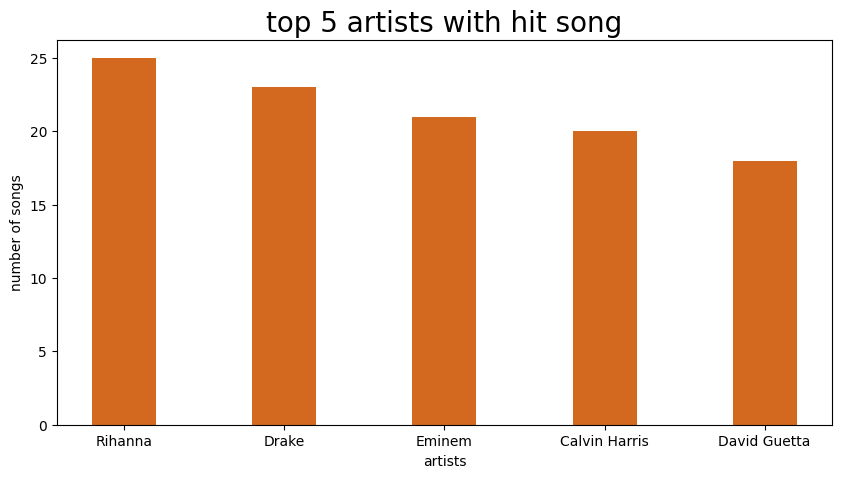

In [12]:
tp_artists_songs = artist[:5]
tp_artists_name = artist[:5].index
fig = plt.figure(figsize = (10,5))
plt.bar(tp_artists_name,tp_artists_songs,width = 0.4,color = "chocolate")
plt.xlabel('artists')
plt.ylabel('number of songs')
plt.title('top 5 artists with hit song',color = 'black',fontsize = 20)
plt.show()

### explicit

In [14]:
fig = px.pie(songs.groupby('explicit', as_index=False).count().sort_values(by='song',ascending=False),
             names='explicit',values='song',
             labels={'song':'Total songs'},hole=.6,
             color_discrete_sequence=['green','crimson'],
             title='<b>Songs having explicit content')
fig.update_layout(title_x=0.5)

### important features

In [15]:
from plotly.subplots import make_subplots

histogram_labels = ['popularity',
                    'danceability', 
                    'energy', 
                    'speechiness', 
                    'loudness', 
                    'acousticness', 
                    'liveness', 
                    'instrumentalness',
                    'valence',
                    'tempo'
                   ]

colors = px.colors.qualitative.Vivid
for i in range(len(histogram_labels)):
    fig = px.histogram(songs, 
                       histogram_labels[i], 
                       title=f'{histogram_labels[i]} distribution in top hits', 
                       height=400, 
                       width=500,
                       color_discrete_sequence=[colors[i]]
                       )
    iplot(fig)

### key

In [16]:
iplot(px.pie(songs['key'].value_counts().reset_index(), 
       names=r'C C♯/D♭ D E♭/D♯ E F F♯/G♭ G A♭/G♯ A B♭/A♯ B'.split(), 
       values='key',
       color_discrete_sequence = px.colors.qualitative.Set3,
       title='Key Distribution'
      ).update_traces(textinfo='label+percent'))

### genre

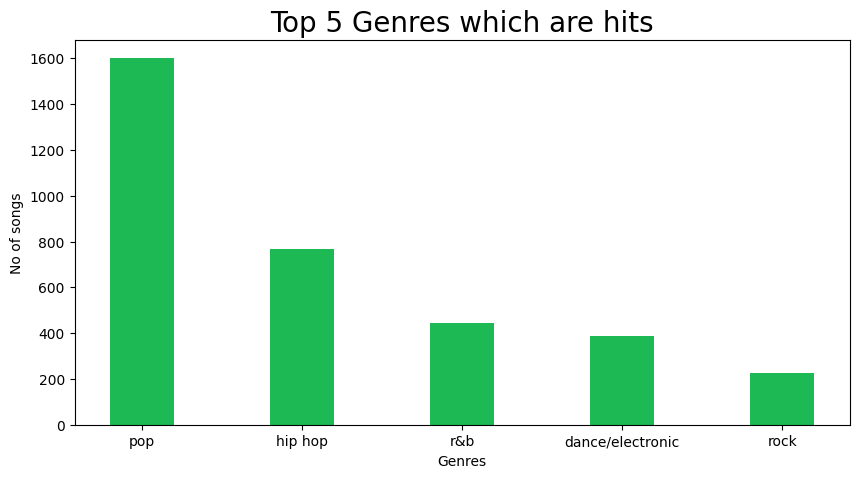

In [17]:
genre_count = songs.iloc[:, 18:33].sum().sort_values(ascending = False)
tp_genres = genre_count[:5]
tp_genres_names = genre_count[:5].index

fig = plt.figure(figsize = (10, 5))
plt.bar(tp_genres_names,tp_genres,width = 0.4,color='#1DB954')
plt.xlabel("Genres")
plt.ylabel("No of songs")
plt.title('Top 5 Genres which are hits',color = 'black',fontsize = 20)
plt.show()

# Similarity Analysis

In [23]:
#calculate average
year_to_year = songs.groupby('year')[['duration_min','explicit','danceability',
                                       'popularity','loudness','energy',
                                       'speechiness','instrumentalness',
                                       'acousticness','liveness','valence','tempo']].mean().sort_values('popularity',ascending=False)
year_to_year

,duration_min,explicit,danceability,popularity,loudness,energy,speechiness,instrumentalness,acousticness,liveness,valence,tempo
year,,,,,,,,,,,,
2018,3.492580,0.476636,0.725037,70.850467,-5.863206,0.642196,0.121519,0.006388,0.208084,0.163456,0.467215,119.220271
2008,3.927921,0.237113,0.664186,63.721649,-5.183258,0.752320,0.087460,0.024706,0.074256,0.173747,0.548686,126.251567
2019,3.278813,0.415730,0.719764,63.011236,-5.869416,0.663921,0.144053,0.003652,0.188749,0.161581,0.535528,127.952989
2002,4.225818,0.333333,0.675244,62.400000,-5.471333,0.722567,0.124220,0.010083,0.144033,0.192847,0.575156,113.280911
2005,3.941905,0.278846,0.672923,61.759615,-5.928894,0.701048,0.127886,0.018278,0.122955,0.187566,0.553077,118.745683
2009,3.934701,0.273810,0.625167,61.535714,-4.979786,0.754702,0.088143,0.027654,0.116025,0.214140,0.568931,124.439369
2010,3.680079,0.214953,0.661075,60.747664,-4.862458,0.773804,0.098915,0.009651,0.099769,0.198615,0.572910,120.925953
2012,3.734084,0.165217,0.637365,60.556522,-4.827043,0.768983,0.078770,0.014997,0.085869,0.217339,0.566124,120.943974
2007,3.862498,0.234043,0.630521,59.925532,-4.994904,0.767149,0.109497,0.012669,0.116893,0.183622,0.559499,121.066968


In [25]:
def calc_cos_sim(df):
    num_columns = len(df.columns)
    cos_sim_df = pd.DataFrame(index = df.columns, columns = df.columns)
    for col1 in df.columns:
        for col2 in df.columns:
            dot_product = np.dot(df[col1], df[col2])
            magnitude1 = np.linalg.norm(df[col1])
            magnitude2 = np.linalg.norm(df[col2])
            similarity = dot_product / (magnitude1 * magnitude2)
            cos_sim_df.at[col1, col2] = similarity
    return cos_sim_df

In [26]:
calc_cos_sim(year_to_year.transpose())

year,2018,2008,2019,2002,2005,2009,2010,2012,2007,2001,2014,2003,2011,2000,2004,2015,2006,2013,2016,2017
year,,,,,,,,,,,,,,,,,,,,
2018,1.0,0.997619,0.996916,0.999437,0.99839,0.997019,0.997484,0.997387,0.997053,0.997671,0.996558,0.996986,0.994954,0.998278,0.997857,0.996569,0.997405,0.993553,0.993463,0.99347
2008,0.997619,1.0,0.999929,0.999322,0.999895,0.999966,0.999998,0.999994,0.999969,0.999963,0.999893,0.999935,0.9995,0.999854,0.999981,0.999881,0.999961,0.998972,0.998927,0.998943
2019,0.996916,0.999929,1.0,0.998901,0.999732,0.999969,0.999944,0.99995,0.999972,0.999907,0.99998,0.999973,0.999743,0.999706,0.999884,0.999978,0.999939,0.999366,0.999341,0.99935
2002,0.999437,0.999322,0.998901,1.0,0.999708,0.998993,0.999246,0.999195,0.999017,0.999372,0.99872,0.99899,0.997686,0.999663,0.999466,0.99873,0.999232,0.996724,0.996652,0.996652
2005,0.99839,0.999895,0.999732,0.999708,1.0,0.999757,0.999864,0.999843,0.999774,0.999933,0.99964,0.99978,0.999015,0.999983,0.999954,0.999652,0.999883,0.998375,0.998328,0.998325
2009,0.997019,0.999966,0.999969,0.998993,0.999757,1.0,0.999979,0.999987,0.999999,0.999918,0.999972,0.999968,0.999724,0.999725,0.999918,0.999958,0.999948,0.999299,0.99926,0.999276
2010,0.997484,0.999998,0.999944,0.999246,0.999864,0.999979,1.0,0.999999,0.999981,0.999952,0.999915,0.999943,0.999557,0.99982,0.999969,0.999901,0.999957,0.999048,0.999005,0.999023
2012,0.997387,0.999994,0.99995,0.999195,0.999843,0.999987,0.999999,1.0,0.999988,0.999947,0.99993,0.99995,0.999595,0.999802,0.99996,0.999914,0.999957,0.999103,0.99906,0.999077
2007,0.997053,0.999969,0.999972,0.999017,0.999774,0.999999,0.999981,0.999988,1.0,0.999932,0.999973,0.999976,0.999715,0.999747,0.999927,0.999962,0.999959,0.999293,0.999254,0.999268


In [28]:
pop = songs[songs['pop'] == 1]
hp = songs[songs['hip hop'] == 1]
rnb = songs[songs['r&b'] == 1]
de = songs[songs['dance/electronic'] == 1]
rock = songs[songs['rock'] == 1]
genre_to_genre = pd.DataFrame()
pop_feature = pop[['duration_min','explicit','danceability','popularity','loudness','energy','speechiness','instrumentalness','acousticness','liveness','valence','tempo']].mean()
hp_feature = hp[['duration_min','explicit','danceability','popularity','loudness','energy','speechiness','instrumentalness','acousticness','liveness','valence','tempo']].mean()
rnb_feature = rnb[['duration_min','explicit','danceability','popularity','loudness','energy','speechiness','instrumentalness','acousticness','liveness','valence','tempo']].mean()
de_feature = de[['duration_min','explicit','danceability','popularity','loudness','energy','speechiness','instrumentalness','acousticness','liveness','valence','tempo']].mean()
rock_feature = rock[['duration_min','explicit','danceability','popularity','loudness','energy','speechiness','instrumentalness','acousticness','liveness','valence','tempo']].mean()

In [29]:
genre_to_genre.insert(loc = 0, value = pop_feature, column = 'pop')
genre_to_genre.insert(loc = 1, value = hp_feature, column = 'hip hop')
genre_to_genre.insert(loc = 2, value = rnb_feature, column = 'r&b')
genre_to_genre.insert(loc = 3, value = de_feature, column = 'dance/electronic')
genre_to_genre.insert(loc = 4, value = rock_feature, column = 'rock')
genre_to_genre

,pop,hip hop,r&b,dance/electronic,rock
duration_min,3.801966,3.900937,3.984459,3.597436,3.781275
explicit,0.251718,0.545573,0.275395,0.118863,0.088496
danceability,0.670732,0.717087,0.689108,0.666744,0.554686
popularity,59.239850,61.975260,58.629797,54.966408,62.849558
loudness,-5.496302,-5.595822,-5.879093,-5.151388,-5.148389
energy,0.714811,0.698659,0.663233,0.766687,0.793128
speechiness,0.101302,0.151741,0.114886,0.079919,0.059052
instrumentalness,0.011274,0.006760,0.006579,0.037666,0.030577
acousticness,0.132144,0.116307,0.150546,0.110175,0.077752
liveness,0.179620,0.187508,0.162687,0.182850,0.197685


In [31]:
calc_cos_sim(genre_to_genre)

,pop,hip hop,r&b,dance/electronic,rock
pop,1.0,0.999719,0.999941,0.999078,0.999982
hip hop,0.999719,1.0,0.999896,0.997784,0.999763
r&b,0.999941,0.999896,1.0,0.998582,0.999928
dance/electronic,0.999078,0.997784,0.998582,1.0,0.998953
rock,0.999982,0.999763,0.999928,0.998953,1.0


# Clustering

In [20]:
from sklearn.cluster import KMeans
clusters = KMeans(n_clusters=5, random_state=6).fit_predict(songs[['duration_min','explicit','danceability',
                                       'popularity','loudness','energy',
                                       'speechiness','instrumentalness',
                                       'acousticness','liveness','valence','tempo']]) # arbitrary choice of k
clustered_songs = pd.DataFrame(songs[['duration_min','explicit','danceability',
                                       'popularity','loudness','energy',
                                       'speechiness','instrumentalness',
                                       'acousticness','liveness','valence','tempo']], 
                                       index = songs[['duration_min','explicit','danceability',
                                       'popularity','loudness','energy',
                                       'speechiness','instrumentalness',
                                       'acousticness','liveness','valence','tempo']].index)
clustered_songs['cluster'] = clusters # create new column with cluster membership
print(clustered_songs.shape) # check
clustered_songs.head()

(1958, 13)


,duration_min,explicit,danceability,popularity,loudness,energy,speechiness,instrumentalness,acousticness,liveness,valence,tempo,cluster
0,3.519333,False,0.751,77,-5.444,0.834,0.0437,0.000018,0.3000,0.3550,0.894,95.053,1
1,3.741550,False,0.551,78,-4.063,0.913,0.0466,0.000013,0.0263,0.3470,0.544,119.992,4
2,3.342667,False,0.614,65,-4.806,0.928,0.0516,0.001040,0.0408,0.0845,0.879,172.656,3
3,4.736667,True,0.949,86,-4.244,0.661,0.0572,0.000000,0.0302,0.0454,0.760,104.504,1
4,4.309333,False,0.708,68,-4.264,0.772,0.0322,0.000000,0.0267,0.4670,0.861,103.035,1


In [21]:
songs_clusters = clustered_songs.groupby('cluster')[clustered_songs.drop(['cluster'],axis = 1).columns].mean()
songs_clusters

,duration_min,explicit,danceability,popularity,loudness,energy,speechiness,instrumentalness,acousticness,liveness,valence,tempo
cluster,,,,,,,,,,,,
0,3.811011,0.336879,0.640507,67.248227,-5.532677,0.726907,0.099280,0.017914,0.113111,0.200065,0.523091,143.288894
1,3.864719,0.322239,0.676036,65.975794,-5.654657,0.688455,0.118543,0.007400,0.147861,0.179218,0.549799,92.796725
2,3.625057,0.237113,0.670485,2.541237,-5.670057,0.707180,0.091094,0.024108,0.131390,0.181732,0.536697,118.869402
3,3.835210,0.374332,0.560316,65.636364,-5.223021,0.740257,0.161356,0.007293,0.120421,0.186987,0.519539,174.333155
4,3.785915,0.182965,0.700560,65.864353,-5.360590,0.747940,0.078507,0.022260,0.116763,0.173643,0.579206,122.570511


# Time Series Analysis

In [36]:
columns = ['duration_min','explicit','danceability','loudness','energy','speechiness','instrumentalness','acousticness','liveness','valence','tempo']
for column in columns:
        iplot(px.line(year_to_year, 
        x=year_to_year.index.sort_values(ascending=True), 
        y=column,
        title='average ' + str(column) + ' over the years',
       ).update_xaxes(type='category').update_traces(textposition='top right'))

In [39]:
pop = songs[songs['pop'] == 1]
pop_durations = pop[['duration_min','year']].groupby('year').mean().reset_index().iloc[0:22]
iplot(px.line(pop_durations, 
        x='year', 
        y='duration_min',
        title='average POP song duration over the years',color_discrete_sequence=px.colors.qualitative.Antique
       ).update_xaxes(type='category').update_traces(textposition='top right'))
hp = songs[songs['hip hop'] == 1]
hp_durations = hp[['duration_min','year']].groupby('year').mean().reset_index().iloc[0:22]
iplot(px.line(hp_durations, 
        x='year', 
        y='duration_min',
        title='average HIP HOP song duration over the years',color_discrete_sequence=px.colors.qualitative.Antique
       ).update_xaxes(type='category').update_traces(textposition='top right'))
rnb = songs[songs['r&b'] == 1]
rnb_durations = rnb[['duration_min','year']].groupby('year').mean().reset_index().iloc[0:22]
iplot(px.line(rnb_durations, 
        x='year', 
        y='duration_min',
        title='average R&B song duration over the years',color_discrete_sequence=px.colors.qualitative.Antique
       ).update_xaxes(type='category').update_traces(textposition='top right'))
de = songs[songs['dance/electronic'] == 1]
de_durations = de[['duration_min','year']].groupby('year').mean().reset_index().iloc[0:22]
iplot(px.line(de_durations, 
        x='year', 
        y='duration_min',
        title='average DANCE/ELECTRONIC song duration over the years',color_discrete_sequence=px.colors.qualitative.Antique
       ).update_xaxes(type='category').update_traces(textposition='top right'))
rock = songs[songs['rock'] == 1]
rock_durations = rock[['duration_min','year']].groupby('year').mean().reset_index().iloc[0:22]
iplot(px.line(rock_durations, 
        x='year', 
        y='duration_min',
        title='average ROCK song duration over the years',color_discrete_sequence=px.colors.qualitative.Antique
       ).update_xaxes(type='category').update_traces(textposition='top right'))

In [41]:
genre_year_duration = pd.DataFrame()
genre_year_duration.insert(loc = 0, value = pop_durations['duration_min'], column = 'pop')
genre_year_duration.insert(loc = 0, value = hp_durations['duration_min'], column = 'hip hop')
genre_year_duration.insert(loc = 0, value = rnb_durations['duration_min'], column = 'r&b')
genre_year_duration.insert(loc = 0, value = de_durations['duration_min'], column = 'dance/electronic')
genre_year_duration.insert(loc = 0, value = rock_durations['duration_min'], column = 'rock')
genre_year_duration.index = hp_durations['year']
genre_year_duration

,rock,dance/electronic,r&b,hip hop,pop
year,,,,,
2000,3.943156,4.614260,4.175619,4.406340,4.078963
2001,4.127899,4.052851,4.176372,4.245249,3.998021
2002,4.154560,4.814217,4.172182,4.377371,4.160408
2003,3.526804,3.743410,4.061713,4.146538,3.996326
2004,3.992964,3.560835,3.953039,4.108108,3.905676
2005,3.858780,4.372530,3.930517,4.021662,3.932390
2006,3.983438,4.298106,3.928335,4.029270,4.003073
2007,3.485939,3.763548,3.960694,4.074222,3.907962
2008,3.736596,3.738350,4.008373,4.196349,3.931208


In [42]:
def calc_euclidean_dist(df):
    num_columns = len(df.columns)
    euclidean_distance_df = pd.DataFrame(index = df.columns, 
                                         columns = df.columns)
    for col1 in df.columns:
        for col2 in df.columns:
            distance = np.sqrt(np.sum((df[col1] - df[col2]) ** 2))
            euclidean_distance_df.at[col1, col2] = distance
    return euclidean_distance_df

In [43]:
calc_euclidean_dist(genre_year_duration)

,rock,dance/electronic,r&b,hip hop,pop
rock,0.0,1.701401,1.519873,1.66494,1.260113
dance/electronic,1.701401,0.0,1.830554,1.320997,1.230037
r&b,1.519873,1.830554,0.0,0.994533,1.010993
hip hop,1.66494,1.320997,0.994533,0.0,0.686493
pop,1.260113,1.230037,1.010993,0.686493,0.0


In [44]:
calc_cos_sim(genre_year_duration)

,rock,dance/electronic,r&b,hip hop,pop
rock,1.0,0.995015,0.997484,0.996277,0.997331
dance/electronic,0.995015,1.0,0.99525,0.997594,0.997396
r&b,0.997484,0.99525,1.0,0.998445,0.999034
hip hop,0.996277,0.997594,0.998445,1.0,0.999661
pop,0.997331,0.997396,0.999034,0.999661,1.0


# Modeling

In [45]:
songs= songs.rename(str,axis="columns") 

In [47]:
from sklearn.preprocessing import StandardScaler
feature = songs.drop(columns=['artist', 'song', 'genre', 'popularity'])
target = songs['popularity']

scaler = StandardScaler()
scaler.fit(feature)
feature_scaled = scaler.transform(feature)
feature_scaled = pd.DataFrame(feature_scaled, columns = feature.columns)
feature_scaled = feature_scaled.drop(columns=['song_num', 'year'])
feature_scaled.head()

,duration_min,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,Key_Value_4,Key_Value_5,Key_Value_6,Key_Value_7,Key_Value_8,Key_Value_9,Key_Value_10,Key_Value_11,artist_num,genre_num
0,-0.439376,-0.617105,0.596807,0.747897,-1.215462,0.030216,-1.114828,-0.626681,0.987285,-0.173713,...,-0.260023,-0.316228,-0.29011,-0.332576,-0.307354,-0.293203,-0.260023,-0.333522,-1.598932,-0.907209
1,-0.097474,-0.617105,-0.828538,1.266437,-1.492482,0.747545,-1.114828,-0.596629,-0.588655,-0.173760,...,-0.260023,-0.316228,-0.29011,-0.332576,-0.307354,-0.293203,-0.260023,-0.333522,-1.594523,-0.817813
2,-0.711194,-0.617105,-0.379554,1.364894,0.723675,0.361611,-1.114828,-0.544815,-0.505165,-0.162146,...,-0.260023,-0.316228,-0.29011,-0.332576,3.253582,-0.293203,-0.260023,-0.333522,-1.590115,-0.907209
3,1.433607,1.620471,2.007898,-0.387639,-0.107384,0.653529,-1.114828,-0.486783,-0.566199,-0.173913,...,-0.260023,3.162278,-0.29011,-0.332576,-0.307354,-0.293203,-0.260023,-0.333522,-1.585707,-0.728416
4,0.776114,-0.617105,0.290358,0.340942,0.446655,0.643140,0.897000,-0.745853,-0.586352,-0.173913,...,-0.260023,-0.316228,-0.29011,3.006830,-0.307354,-0.293203,-0.260023,-0.333522,-1.581298,-0.639019


In [48]:
scaler_y = StandardScaler()
scaler_y.fit(target.values.reshape(-1,1))
target_scaled = scaler_y.transform(target.values.reshape(-1,1))
target_scaled = np.concatenate( target_scaled, axis=0 )

In [49]:
# Divide in train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature_scaled , target_scaled, 
                                                    shuffle = True, 
                                                    test_size=0.2, 
                                                    random_state=1)

In [59]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
def print_results(regressor, X_train, X_test, y_train, y_test):
    regressor.fit(X_train, y_train)
    y_predict = regressor.predict(X_test)
    # The mean squared error
    print("Mean squared error: %.4f" % mean_squared_error(y_test, y_predict))
    print("Mean absolute error: %.4f" % mean_absolute_error(y_test, y_predict))
    #print("Accuracy: %.4f" % accuracy_score(y_test, y_predict))
    # The coefficient of determination: 1 is perfect prediction
    #print("Coefficient of determination: %.4f" % r2_score(y_test, y_predict))

In [69]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

print_results(lr, X_train, X_test, y_train, y_test)
print("Accuracy: %.4f" % accuracy_score(y_test.astype(int), lr.predict(X_test).astype(int)))

Mean squared error: 0.8650
Mean absolute error: 0.6433
Accuracy: 0.8776


In [68]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

print_results(rf, X_train, X_test, y_train, y_test)
print("Accuracy: %.4f" % accuracy_score(y_test.astype(int), rf.predict(X_test).astype(int)))

Mean squared error: 0.8819
Mean absolute error: 0.6503
Accuracy: 0.8724


<Axes: >

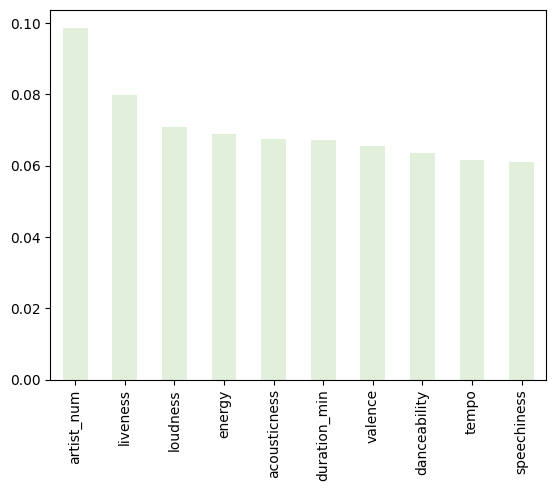

In [62]:
importances = rf.feature_importances_
forest_importances = pd.Series(importances, index=X_train.columns)

pd.Series(forest_importances.sort_values(ascending=False)[:10]).plot(kind = 'bar', color = '#E2EFDA')

In [67]:
from sklearn.svm import SVC

svm = SVC()

print_results(svm, X_train, X_test, y_train.astype(int), y_test.astype(int))
print("Accuracy: %.4f" % accuracy_score(y_test.astype(int), svm.predict(X_test).astype(int)))

Mean squared error: 0.3495
Mean absolute error: 0.1964
Accuracy: 0.8801
